### Computational Guided Inquiry for Modeling Earth's Climate (Eklof & Neshyba, 2026)

# For Loops

## Overview
Our numerical method for simulating Earth's climate will be to set up a loop, but the type of loop we'll use for this time is a little different from the *while* loop we used previously: it's called a *for* loop. The main reason for the switch is, we're going to specify exactly how far forward in time we want to go, and *for looping* is better suited for that kind of thing. 

As it turns out, inside our loop, it'll also to collect values in an array, for plotting later. Sometimes we'll want to accumulate multiple arrays!

## Learning objectives
1. I can set up "for" loops of specifed length
1. I can accumulate values in a numpy array
1. I can plot multiple arrays on a single graph, and annotate using the "label/legend" method
1. I can interpret exponential growth and decay curves in terms of $t_{1/2}$, and predict $t_{1/2}$ from a rate constant $k$ using the "70s rule."

In [1]:
# Bring in resources
import numpy as np
import matplotlib.pyplot as plt; plt.rc("figure", figsize=(12,8))

### A couple of examples of "for" loops
 We lay out a couple of examples in the cells below. Some notes about this:

- Like a "while" loop, everything indented below the "for" line is part of the loop. Once you stop indenting, the loop is over. 
- We're using Python's "range" function to specify how many iterations we want. 
- The assumed lower limit of "range" is zero, and looping stops one short of the upper limit.

In [2]:
# A loop that starts at 0 and goes to 4
for i in range(5):
    print(i)
print("i's last value was",i)

0
1
2
3
4
i's last value was 4


In [3]:
# A loop that starts at 1 and goes to 4
for j in range(1,5):
    print(j)
print("j's last value was",j)

1
2
3
4
j's last value was 4


### Your turn
Set up a loop using the "range" function that starts at 10 and goes to 13, printing the index as you go along.

In [4]:
### BEGIN SOLUTION
for j in range(10,14):
    print(j)
### END SOLUTION

10
11
12
13


### Looping over a numpy array
This is a little different. We're going to create a numpy array first, and loop over it letting "range" figure out how long it is.

In [5]:
# Here's a Numpy array
time = np.linspace(0,10,5)
print('The length of this array is', len(time))

# Here's looping over the contents of "time"
for i in range(len(time)):
    thistime = time[i]
    print(i,thistime)

The length of this array is 5
0 0.0
1 2.5
2 5.0
3 7.5
4 10.0


### Your turn
Repeat almost exactly what you just did, but give *time* 6 elements, starting at 1 and ending at 20. Then loop over the elements in *time*, printing *i* and the time corresponding to it each iteration.

In [6]:
# Make a numpy array as described above, using np.linspace
### BEGIN SOLUTION
time = np.linspace(1,20,6)
print('the length of array time =', len(time))
### END SOLUTION

# Loop over the elements in the "time" array and print i and the ith time
### BEGIN SOLUTION
for i in range(len(time)):
    thistime = time[i]
    print(i,thistime)
### END SOLUTION

the length of array time = 6
0 1.0
1 4.8
2 8.6
3 12.399999999999999
4 16.2
5 20.0


### Building arrays of numbers within a loop
Next we'll examine how to accumulate values calculated within a loop. Previously, we used a Python "list" for this kind of thing, but this time we'll be using *numpy arrays*. Why? Numpy arrays are a little more versatile in terms of the kind of mathematical operation they permit. 

We're also taking this opportunity to introduce how to annotate two curves on the same graph using the "label/legend" method (which can be very handy). 

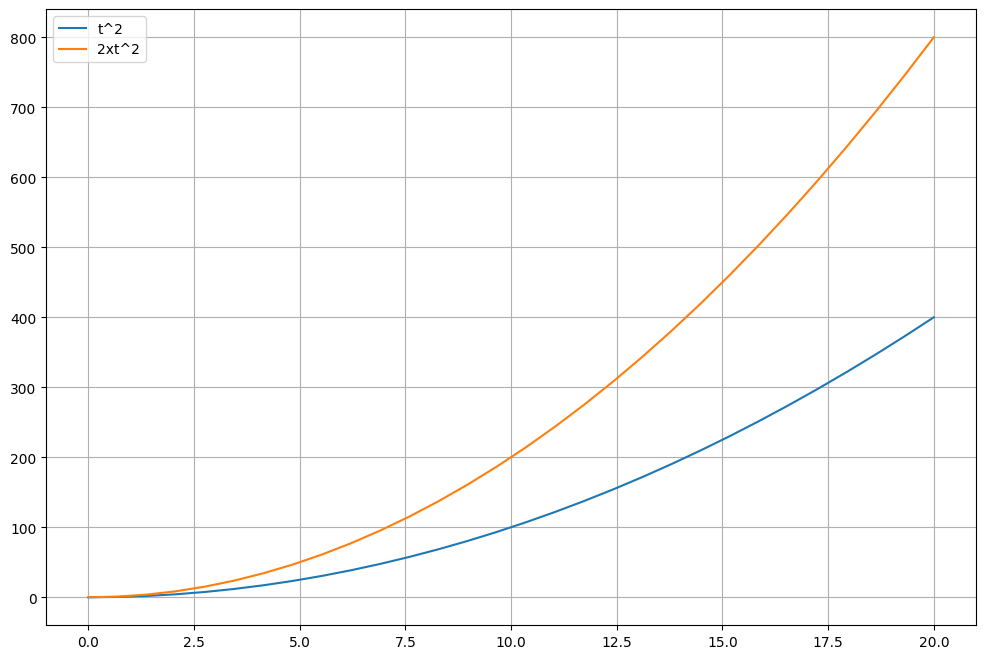

In [7]:
# Create a time array (this one will have 30 elements)
time = np.linspace(0,20,30)

# Initialize a couple empty lists
myarray1 = np.empty(0)
myarray2 = np.empty(0)

# Loop over the elements of time
for i in range(len(time)):
    
    # Extract the time in this iteration, and square it
    thisvalue1 = time[i]**2
    
    # Make another value that's twice what we just got
    thisvalue2 = 2*thisvalue1
    
    # append both of these values to our lists
    myarray1 = np.append(myarray1,thisvalue1)
    myarray2 = np.append(myarray2,thisvalue2)

# Graph the results using the label/legend method
plt.figure()
plt.plot(time,myarray1,label='t^2')
plt.plot(time,myarray2,label='2xt^2')
plt.legend()
plt.grid(True)

### Your turn
Do this again, but with a new time array that has 500 elements ranging from 0 to 100 (years). In the loop, you'll construct two numpy arrays. One should describe exponential *growth*, which in mathematical terms would be written $e^{kt}$. We'll use $k=0.014$ for this. In Python, you'll need to write something like 

    thisvalue1 = np.exp(k*time[i])

We also want to compute exponential *decay*, i.e., $e^{-kt}$ (with the same value of $k$), for each time step:

    thisvalue2 = np.exp(-k*time[i])

Accumulate these values to their own numpy arrays (say, myarray1 and myarray2). Once the loop is done, plot these arrays on the same graph, and annotate them using the label/legend method.

t half =  50.0


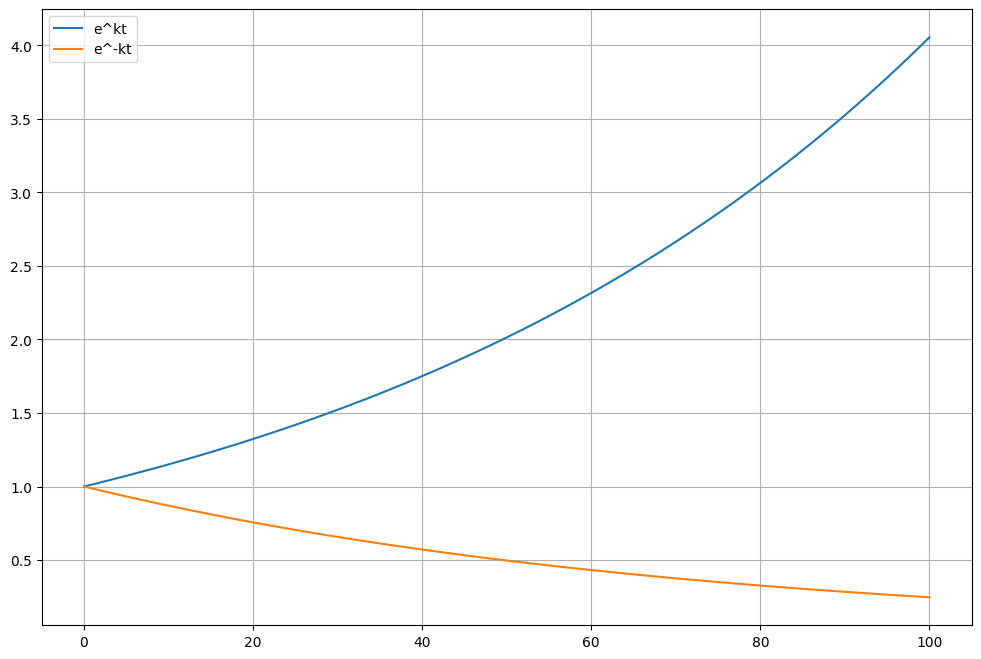

In [8]:
# Define the rate constant
k = 0.014

# Create our x array
### BEGIN SOLUTION
time = np.linspace(0,100,500)

# Not part of the solution, but calculate t_1/2:
thalf = 70/k/100
print('t half = ', thalf)

### END SOLUTION

# Initialize a couple of empty numpy arrays using np.empty
### BEGIN SOLUTION
myarray1 = np.empty(0)
myarray2 = np.empty(0)
### END SOLUTION

# Loop over all the elements in x, calculate e^kx and e^(-kx), append them to your two numpy arrays
### BEGIN SOLUTION
for i in range(len(time)):
    thisvalue1 = np.exp(k*time[i])
    thisvalue2 = np.exp(-k*time[i])
    myarray1 = np.append(myarray1,thisvalue1)
    myarray2 = np.append(myarray2,thisvalue2)
### END SOLUTION

# Graph the results using the label/legend method; also turn the grid display to True
### BEGIN SOLUTION
plt.figure()
plt.plot(time,myarray1,label='e^kt')
plt.plot(time,myarray2,label='e^-kt')
plt.legend()
plt.grid(True)
### END SOLUTION

### Pause for analysis
You may have noticed something about these two graphs: the time it took for $e^{kt}$ to double is about the same time it took for $e^{-kt}$ to drop by a factor of 2. We'll use the notation $t_{1/2}$ for this time. Carry out the following analysis along these lines:

1. Guestimating from the graph, what's the value of $t_{1/2}$?
1. Using the rule of 70s, what do you get for $t_{1/2}$? (Don't forget the factor of 100.)

### BEGIN SOLUTION

It's about 50 years.

### END SOLUTION

### Validating and finishing up
Assuming all this has gone smoothly, don't forget to do a Kernel/Restart & Run All, run the whole notebook, and make sure there aren't any errors.